# Classifying Flood Data

## Training and Testing Models

In [1]:
import numpy as np
from keras import models
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Flatten
from keras.layers.convolutional import Conv2D
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow import GradientTape
import os 
import cv2
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
from keras.layers import Dropout
from tensorflow.keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


np.random.seed(1492)

from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator

In [2]:
current_path = 'C:/Users/Corinne/Documents/CPSC_393'

In [3]:
train_dir = current_path + '/train_another'
test_dir = current_path + '/test'
validation_dir = current_path + '/validation_another'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128, 128),
    batch_size = 100,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (128,128),
    batch_size = 100,
    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (128,128),
    batch_size = 100,
    class_mode = 'binary'
)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [19]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (128, 128, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(learning_rate=1e-4), metrics = ['acc'])

In [20]:
history = model.fit(
train_generator,
steps_per_epoch = 100,
epochs = 50,
validation_data = validation_generator,
validation_steps = 20)

Epoch 1/50
100/100 [==============================] - 91s 895ms/step - loss: 0.7760 - acc: 0.6000 - val_loss: 0.8623 - val_acc: 0.5380
Epoch 2/50
100/100 [==============================] - 89s 885ms/step - loss: 0.5312 - acc: 0.7488 - val_loss: 0.4559 - val_acc: 0.8335
Epoch 3/50
100/100 [==============================] - 92s 921ms/step - loss: 0.4514 - acc: 0.8191 - val_loss: 0.5377 - val_acc: 0.7420
Epoch 4/50
100/100 [==============================] - 90s 903ms/step - loss: 0.3913 - acc: 0.8502 - val_loss: 0.3446 - val_acc: 0.8795
Epoch 5/50
100/100 [==============================] - 98s 980ms/step - loss: 0.3269 - acc: 0.8750 - val_loss: 0.2808 - val_acc: 0.9070
Epoch 6/50
100/100 [==============================] - 89s 888ms/step - loss: 0.2863 - acc: 0.8953 - val_loss: 0.4088 - val_acc: 0.8385
Epoch 7/50
100/100 [==============================] - 90s 901ms/step - loss: 0.2513 - acc: 0.9057 - val_loss: 0.2320 - val_acc: 0.9165
Epoch 8/50
100/100 [==============================] - 8

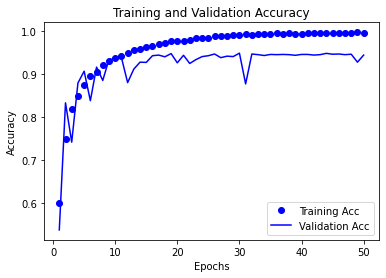

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

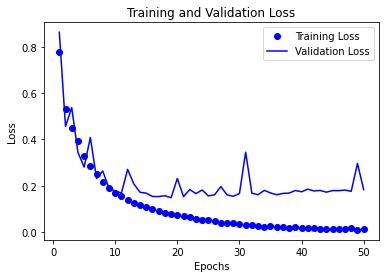

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 127008)            0         
                                                                 
 dense_4 (Dense)             (None, 512)               65028608  
                                                                 
 dense_5 (Dense)             (None, 1)                 513       
                                                                 
Total params: 65,030,017
Trainable params: 65,030,017
Non-trainable params: 0
__________________________________________

In [24]:
model.save('base_flooding_model')

2022-05-03 20:45:10.986294: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: base_flooding_model/assets


In [26]:
model1 = Sequential()
model1.add(Conv2D(32,(5,5), activation = 'relu', input_shape = (128, 128, 3)))
model1.add(MaxPooling2D((2,2)))
model1.add(Flatten())
model1.add(Dense(512, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

model1.compile(loss = 'binary_crossentropy', optimizer = RMSprop(learning_rate=1e-4), metrics = ['acc'])

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 123008)            0         
                                                                 
 dense_8 (Dense)             (None, 512)               62980608  
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 62,983,553
Trainable params: 62,983,553
Non-trainable params: 0
__________________________________________

In [28]:
history1 = model1.fit(
train_generator,
steps_per_epoch = 100,
epochs = 50, 
validation_data = validation_generator,
validation_steps = 20 )

Epoch 1/50
100/100 [==============================] - 102s 1s/step - loss: 0.7123 - acc: 0.6221 - val_loss: 0.5015 - val_acc: 0.7875
Epoch 2/50
100/100 [==============================] - 103s 1s/step - loss: 0.5018 - acc: 0.7788 - val_loss: 0.4334 - val_acc: 0.8580
Epoch 3/50
100/100 [==============================] - 105s 1s/step - loss: 0.4407 - acc: 0.8248 - val_loss: 0.3895 - val_acc: 0.8640
Epoch 4/50
100/100 [==============================] - 95s 945ms/step - loss: 0.3926 - acc: 0.8463 - val_loss: 0.3628 - val_acc: 0.8650
Epoch 5/50
100/100 [==============================] - 98s 979ms/step - loss: 0.3449 - acc: 0.8661 - val_loss: 0.3849 - val_acc: 0.8395
Epoch 6/50
100/100 [==============================] - 97s 973ms/step - loss: 0.3041 - acc: 0.8861 - val_loss: 0.2982 - val_acc: 0.8985
Epoch 7/50
100/100 [==============================] - 100s 995ms/step - loss: 0.2714 - acc: 0.8942 - val_loss: 0.3654 - val_acc: 0.8405
Epoch 8/50
100/100 [==============================] - 98s 97

In [29]:
model1.save('window5_flooding_model')

INFO:tensorflow:Assets written to: window5_flooding_model/assets


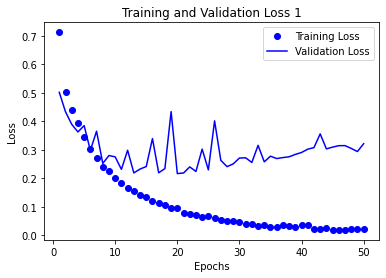

In [39]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training and Validation Loss 1")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

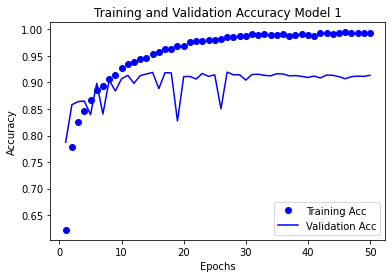

In [40]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title("Training and Validation Accuracy Model 1")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [41]:
model2 = Sequential()
model2.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (128, 128, 3)))
model2.add(MaxPooling2D((2,2)))
model2.add(Conv2D(64,(3,3), activation = 'relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(512, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

model2.compile(loss = 'binary_crossentropy', optimizer = RMSprop(learning_rate=1e-4), metrics = ['acc'])

model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 57600)             0         
                                                                 
 dropout_1 (Dropout)         (None, 57600)            

In [42]:
history2 = model2.fit(
train_generator,
steps_per_epoch = 100,
epochs = 50, 
validation_data = validation_generator,
validation_steps = 20 )

Epoch 1/50
100/100 [==============================] - 106s 1s/step - loss: 0.6465 - acc: 0.6390 - val_loss: 0.5169 - val_acc: 0.7910
Epoch 2/50
100/100 [==============================] - 99s 991ms/step - loss: 0.5233 - acc: 0.7664 - val_loss: 0.4776 - val_acc: 0.8000
Epoch 3/50
100/100 [==============================] - 99s 990ms/step - loss: 0.4656 - acc: 0.8035 - val_loss: 0.4464 - val_acc: 0.8130
Epoch 4/50
100/100 [==============================] - 99s 989ms/step - loss: 0.4286 - acc: 0.8286 - val_loss: 0.3843 - val_acc: 0.8545
Epoch 5/50
100/100 [==============================] - 102s 1s/step - loss: 0.3928 - acc: 0.8435 - val_loss: 0.4104 - val_acc: 0.8310
Epoch 6/50
100/100 [==============================] - 102s 1s/step - loss: 0.3698 - acc: 0.8549 - val_loss: 0.3086 - val_acc: 0.8920
Epoch 7/50
100/100 [==============================] - 102s 1s/step - loss: 0.3344 - acc: 0.8655 - val_loss: 0.2787 - val_acc: 0.8915
Epoch 8/50
100/100 [==============================] - 109s 1s/s

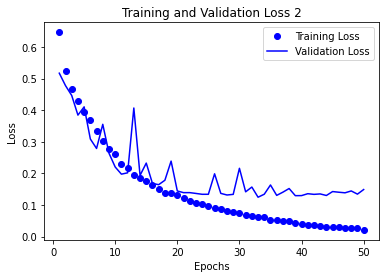

In [43]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training and Validation Loss 2")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

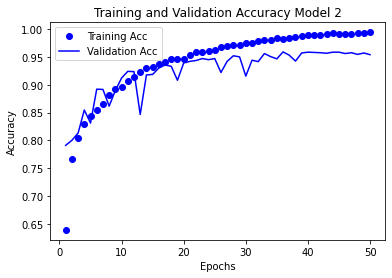

In [44]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title("Training and Validation Accuracy Model 2")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [46]:
model2.save('5layer_flooding_model')

INFO:tensorflow:Assets written to: 5layer_flooding_model/assets


In [47]:
model3 = Sequential()
model3.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (128, 128, 3)))
model3.add(MaxPooling2D((2,2)))
model3.add(Conv2D(64,(3,3), activation = 'relu'))
model3.add(MaxPooling2D((2,2)))
model3.add(Conv2D(128,(3,3), activation = 'relu'))
model3.add(MaxPooling2D((2,2)))
model3.add(Flatten())
model3.add(Dropout(0.5))
model3.add(Dense(512, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))

model3.compile(loss = 'binary_crossentropy', optimizer = RMSprop(learning_rate=1e-4), metrics = ['acc'])

model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 128)    

In [49]:
history3 = model3.fit(
train_generator,
steps_per_epoch = 100,
epochs = 50, 
validation_data = validation_generator,
validation_steps = 20 )

Epoch 1/50
100/100 [==============================] - 108s 1s/step - loss: 0.5682 - acc: 0.7082 - val_loss: 0.4613 - val_acc: 0.8130
Epoch 2/50
100/100 [==============================] - 104s 1s/step - loss: 0.4518 - acc: 0.8097 - val_loss: 0.3775 - val_acc: 0.8545
Epoch 3/50
100/100 [==============================] - 104s 1s/step - loss: 0.3938 - acc: 0.8363 - val_loss: 0.3267 - val_acc: 0.8640
Epoch 4/50
100/100 [==============================] - 106s 1s/step - loss: 0.3463 - acc: 0.8615 - val_loss: 0.3199 - val_acc: 0.8705
Epoch 5/50
100/100 [==============================] - 111s 1s/step - loss: 0.2966 - acc: 0.8799 - val_loss: 0.2453 - val_acc: 0.9030
Epoch 6/50
100/100 [==============================] - 112s 1s/step - loss: 0.2636 - acc: 0.8953 - val_loss: 0.2927 - val_acc: 0.8735
Epoch 7/50
100/100 [==============================] - 111s 1s/step - loss: 0.2268 - acc: 0.9083 - val_loss: 0.1916 - val_acc: 0.9270
Epoch 8/50
100/100 [==============================] - 111s 1s/step - 

In [50]:
model3.save('7layer_flooding_model')

INFO:tensorflow:Assets written to: 7layer_flooding_model/assets


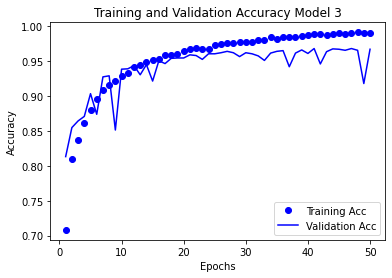

In [62]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title("Training and Validation Accuracy Model 3")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

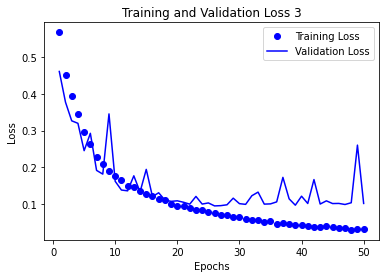

In [63]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training and Validation Loss 3")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [55]:
modelA = Sequential()
modelA.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (128, 128, 3)))
modelA.add(MaxPooling2D((2,2)))
modelA.add(Dropout(0.25))
modelA.add(Conv2D(64,(3,3), activation = 'relu'))
modelA.add(MaxPooling2D((2,2)))
modelA.add(Dropout(0.25))
modelA.add(Flatten())
modelA.add(Dropout(0.5))
modelA.add(Dense(512, activation = 'relu'))
modelA.add(Dense(1, activation = 'sigmoid'))

modelA.compile(loss = 'binary_crossentropy', optimizer = RMSprop(learning_rate=1e-4), metrics = ['acc'])

modelA.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 30, 30, 64)      

In [56]:
history2 = modelA.fit(
train_generator,
steps_per_epoch = 100,
epochs = 50, 
validation_data = validation_generator,
validation_steps = 20 )

Epoch 1/50
100/100 [==============================] - 109s 1s/step - loss: 0.7196 - acc: 0.5521 - val_loss: 0.6671 - val_acc: 0.5320
Epoch 2/50
100/100 [==============================] - 108s 1s/step - loss: 0.6108 - acc: 0.6585 - val_loss: 0.6754 - val_acc: 0.5370
Epoch 3/50
100/100 [==============================] - 109s 1s/step - loss: 0.5413 - acc: 0.7409 - val_loss: 0.6112 - val_acc: 0.6265
Epoch 4/50
100/100 [==============================] - 109s 1s/step - loss: 0.5024 - acc: 0.7731 - val_loss: 0.6236 - val_acc: 0.6165
Epoch 5/50
100/100 [==============================] - 108s 1s/step - loss: 0.4689 - acc: 0.7968 - val_loss: 0.7368 - val_acc: 0.5540
Epoch 6/50
100/100 [==============================] - 109s 1s/step - loss: 0.4437 - acc: 0.8179 - val_loss: 0.7296 - val_acc: 0.5630
Epoch 7/50
100/100 [==============================] - 111s 1s/step - loss: 0.4231 - acc: 0.8274 - val_loss: 0.8605 - val_acc: 0.5410
Epoch 8/50
100/100 [==============================] - 110s 1s/step - 

In [58]:
modelA.save('Model_A_flooding_model')

INFO:tensorflow:Assets written to: Model_A_flooding_model/assets


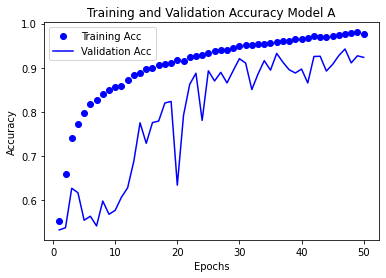

In [65]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title("Training and Validation Accuracy Model A")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

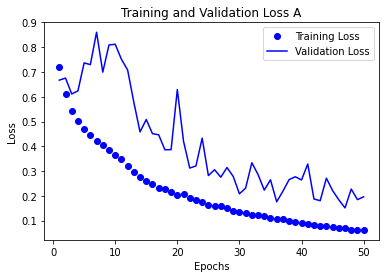

In [66]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training and Validation Loss A")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [67]:
modelB = Sequential()
modelB.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (128, 128, 3)))
modelB.add(MaxPooling2D((2,2)))
modelB.add(Dropout(0.5))
modelB.add(Conv2D(64,(3,3), activation = 'relu'))
modelB.add(MaxPooling2D((2,2)))
modelB.add(Dropout(0.5))
modelB.add(Flatten())
modelB.add(Dropout(0.5))
modelB.add(Dense(512, activation = 'relu'))
modelB.add(Dense(1, activation = 'sigmoid'))

modelB.compile(loss = 'binary_crossentropy', optimizer = RMSprop(learning_rate=1e-4), metrics = ['acc'])

modelB.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 30, 30, 64)      

In [68]:
historyB = modelB.fit(
train_generator,
steps_per_epoch = 100,
epochs = 69, 
validation_data = validation_generator,
validation_steps = 20 )

Epoch 1/69
100/100 [==============================] - 112s 1s/step - loss: 0.7766 - acc: 0.5377 - val_loss: 0.6950 - val_acc: 0.5000
Epoch 2/69
100/100 [==============================] - 115s 1s/step - loss: 0.6744 - acc: 0.5753 - val_loss: 0.7010 - val_acc: 0.5005
Epoch 3/69
100/100 [==============================] - 109s 1s/step - loss: 0.6507 - acc: 0.6192 - val_loss: 0.7046 - val_acc: 0.5005
Epoch 4/69
100/100 [==============================] - 108s 1s/step - loss: 0.6179 - acc: 0.6568 - val_loss: 0.7282 - val_acc: 0.5005
Epoch 5/69
100/100 [==============================] - 109s 1s/step - loss: 0.5742 - acc: 0.7078 - val_loss: 0.7258 - val_acc: 0.5060
Epoch 6/69
100/100 [==============================] - 108s 1s/step - loss: 0.5445 - acc: 0.7342 - val_loss: 0.7040 - val_acc: 0.5175
Epoch 7/69
100/100 [==============================] - 109s 1s/step - loss: 0.5122 - acc: 0.7621 - val_loss: 0.7475 - val_acc: 0.5060
Epoch 8/69
100/100 [==============================] - 109s 1s/step - 

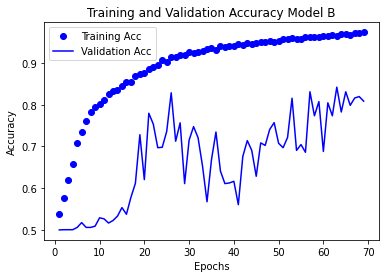

In [71]:
acc = historyB.history['acc']
val_acc = historyB.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title("Training and Validation Accuracy Model B")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

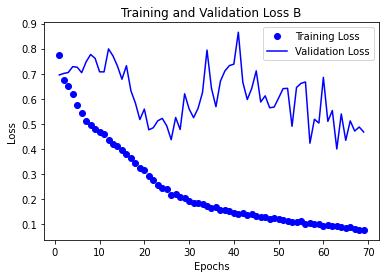

In [72]:
loss = historyB.history['loss']
val_loss = historyB.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training and Validation Loss B")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [73]:
modelB.save('Model_B_flooding_model')

INFO:tensorflow:Assets written to: Model_B_flooding_model/assets


In [26]:
model3 = load_model(current_path+'/7_layer_flooding_model')
scores2 = model3.evaluate(test_generator, steps = 20)
print('Test Loss: %.3f' % scores2[0])
print('Test Accuracy: %.3f' % scores2[1])

Test Loss: 0.067
Test Accuracy: 0.980


## Layer Visualization

In [12]:
model = model3

In [13]:
#Tensor to image

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x*= 0.1
    
    x+= 0.5
    x = np.clip(x, 0 ,1)
    
    x*= 255
    x = np.clip(x, 0, 255).astype('uint8')
    
    return x

In [14]:
#Creating a function to generate filter visualizations
def generate_pattern(layer_name, filter_index, size = 128):
    
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value*step
        
    img = input_img_data[0]
    return deprocess_image(img)


In [15]:
#You'll need to get the layer names from the final model
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 128)    

In [16]:
#Set path to load in 2 images
img_path = validation_dir  + '/damage/-93.6712_30.218462.jpeg'
img_path2 = validation_dir + '/no_damage/-95.07704_29.826776000000002.jpeg'

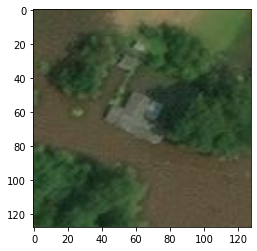

In [17]:
img = image.load_img(img_path, target_size = (128, 128))
img2 = image.load_img(img_path2, target_size = (128, 128))

img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)
img /= 255

img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis = 0)
img2 /= 255

plt.imshow(img[0])

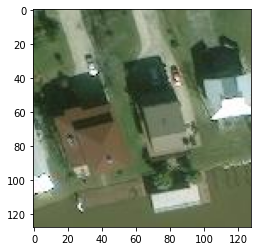

In [18]:
plt.imshow(img2[0])

In [19]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img)

c:\users\corinne\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


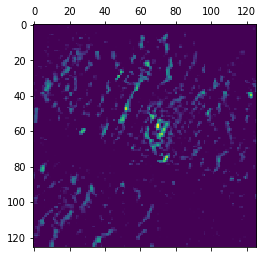

In [20]:
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0,:,:,4], cmap = 'viridis')

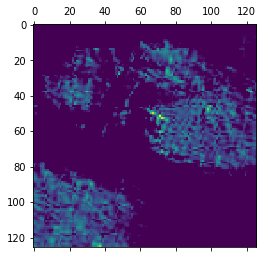

In [21]:
plt.matshow(first_layer_activation[0,:,:,7], cmap = 'viridis')

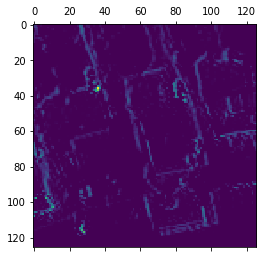

In [22]:
activations2 = activation_model.predict(img2)
first_layer_activation2 = activations2[0]
plt.matshow(first_layer_activation2[0,:,:,4], cmap = 'viridis')

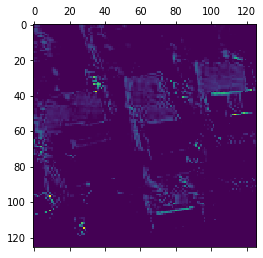

In [23]:
plt.matshow(first_layer_activation2[0,:,:,7], cmap = 'viridis')

<ipython-input-24-dac1afbc8911>:21: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


MemoryError: Unable to allocate 115. TiB for an array with shape (78675968, 200704) and data type float64

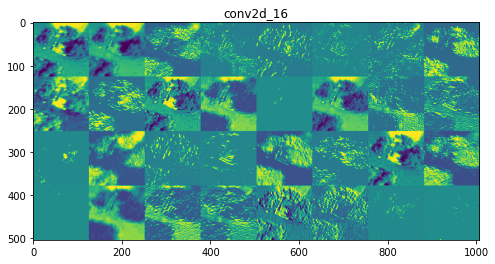

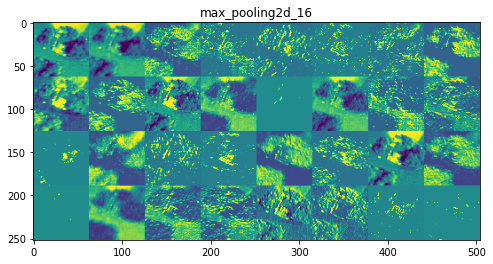

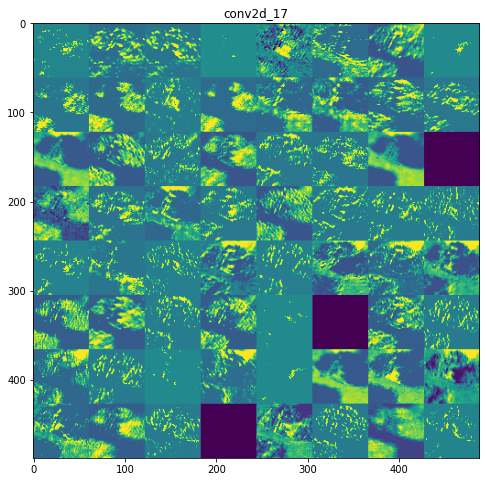

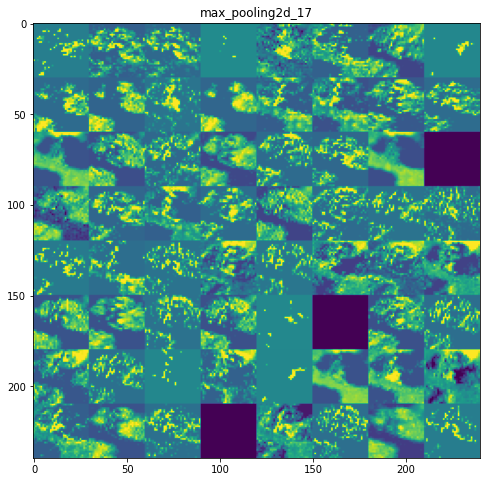

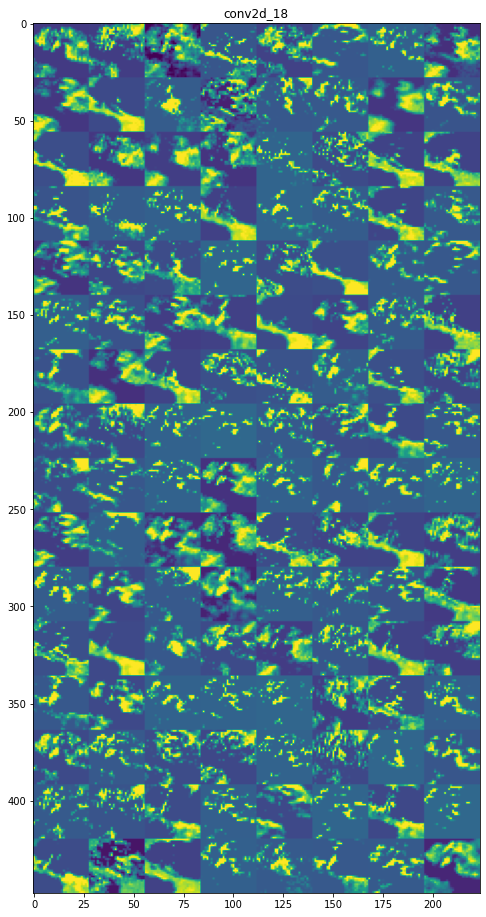

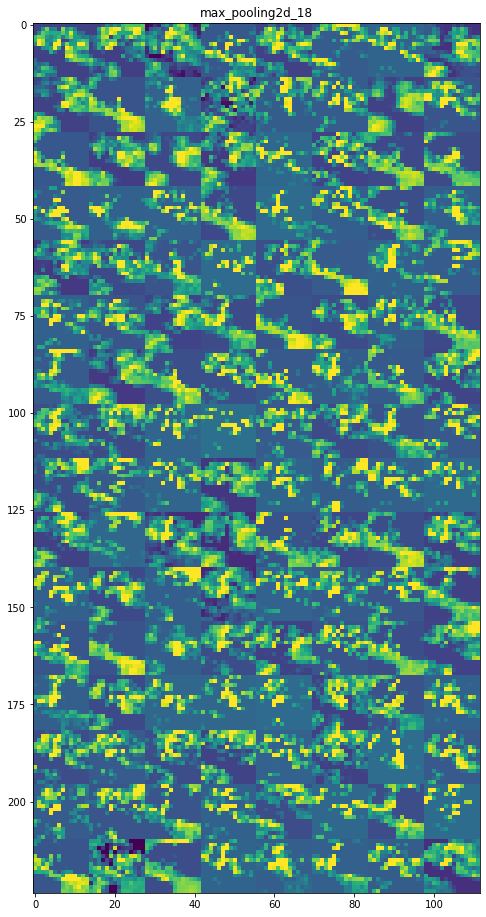

In [24]:
#Visualizing the layers on top of a 'damage' image
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 8

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :,:, col* images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size : (col + 1) * size, row*size : (row+1) * size] = channel_image
            
    scale = 1./size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

<ipython-input-25-1c24918358f0>:21: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


MemoryError: Unable to allocate 115. TiB for an array with shape (78675968, 200704) and data type float64

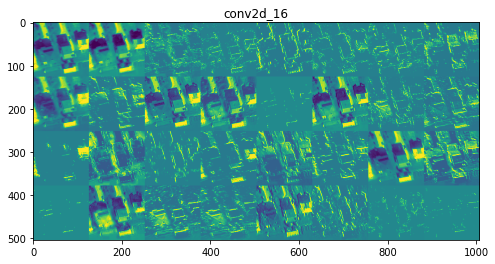

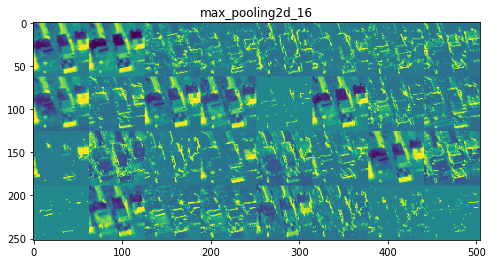

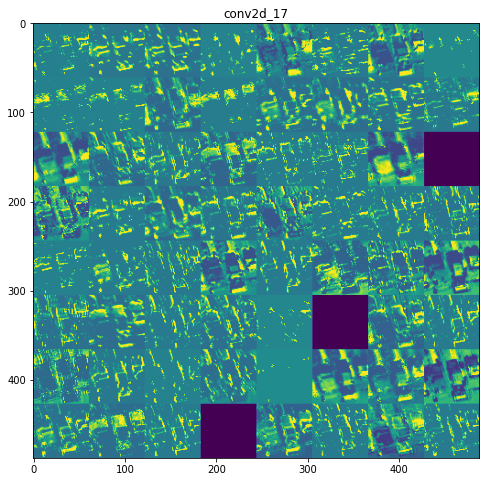

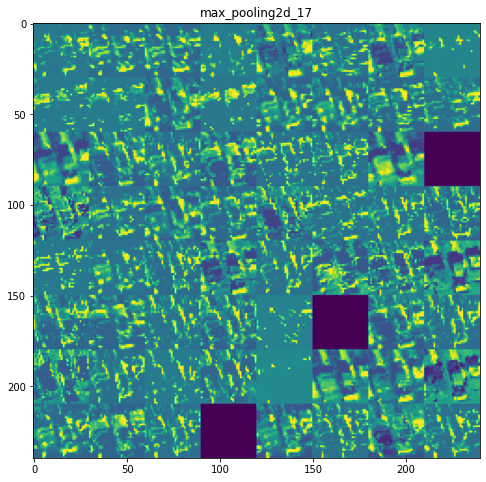

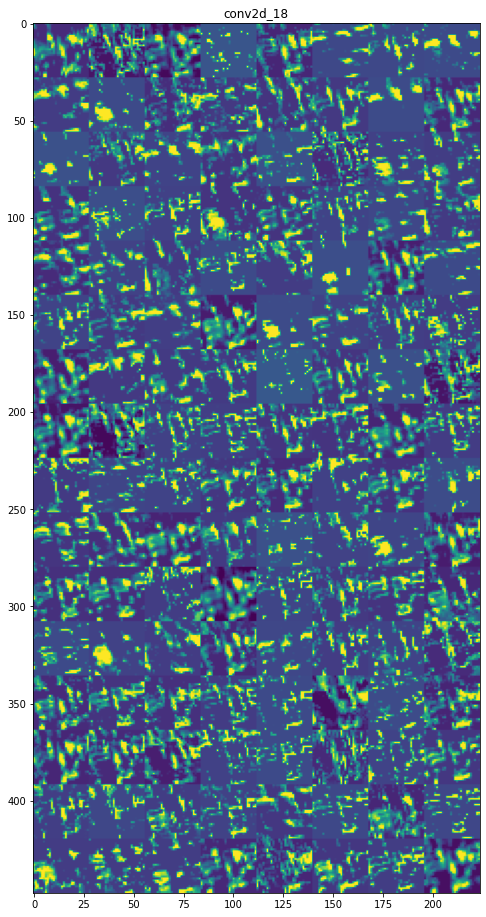

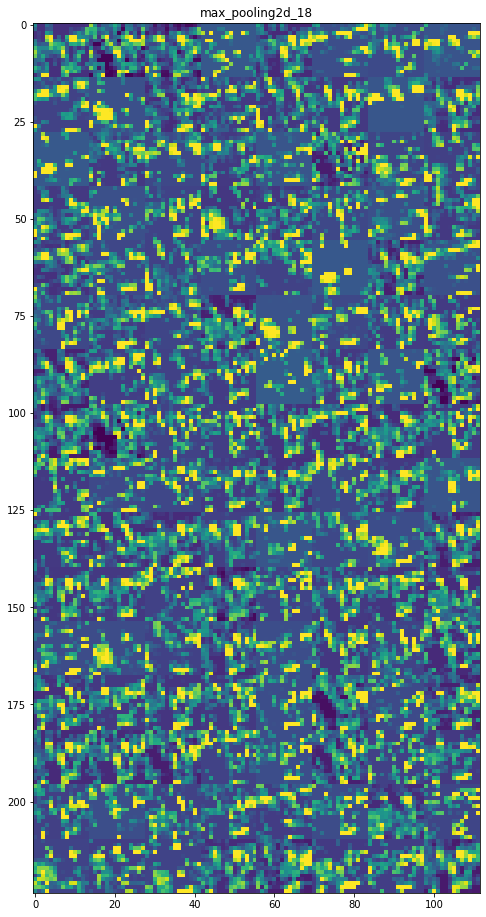

In [25]:
#with a no_damage image
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 8

for layer_name, layer_activation in zip(layer_names, activations2):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :,:, col* images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size : (col + 1) * size, row*size : (row+1) * size] = channel_image
            
    scale = 1./size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')